In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Customer Segmentation Project

## Overview
This project aims to segment customers based on their demographic and spending behavior using K-means clustering. Customer segmentation is a crucial task in marketing and customer relationship management, as it helps businesses understand their customers better and tailor their marketing strategies accordingly.

## Dataset
The dataset consists of 200 entries with the following columns:
- **CustomerID**: Unique identifier for each customer.
- **Gender**: Gender of the customer (categorical).
- **Age**: Age of the customer (numerical).
- **Annual Income (k$)**: Annual income of the customer in thousands of dollars (numerical).
- **Spending Score (1-100)**: Spending score assigned to the customer based on their purchasing behavior and past interactions (numerical).

## Steps
1. **Data Understanding and Exploration**:
   - Explore the structure and contents of the dataset.
   - Analyze the distribution and summary statistics of each column.
   - Visualize the data to gain insights.

2. **Data Preprocessing**:
   - Handle missing values.
   - Encode categorical variables like Gender.
   - Standardize or normalize numerical features.

3. **Feature Selection/Engineering**:
   - Create new features if necessary.
   - Select relevant features for clustering.

4. **Choosing the Number of Clusters**:
   - Determine the optimal number of clusters using methods like the elbow method or silhouette score.
   - Visualize clustering performance for different numbers of clusters.

5. **Applying K-means Clustering**:
   - Perform K-means clustering with the chosen number of clusters.
   - Fit the model to the dataset.

6. **Interpretation and Evaluation**:
   - Analyze resulting clusters to understand customer segments.
   - Evaluate clustering quality using internal and external metrics.

7. **Visualization of Clusters**:
   - Visualize clusters in the feature space.
   - Plot clusters against different pairs of features.

8. **Profile and Label the Clusters**:
   - Assign labels to clusters based on characteristics.
   - Create customer profiles for each segment.

## Conclusion
Customer segmentation through K-means clustering provides valuable insights into customer behavior and preferences, enabling businesses to personalize marketing strategies and enhance customer satisfaction.



In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Step 01: Data Understanding and Exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**Step 02: Data Preprocessing**

In [7]:
#Checking for missing value|
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:

# Replace string values with numerical values
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

# Display the first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


/tmp/ipykernel_18/757519904.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


**Step 03: Data Visualization**

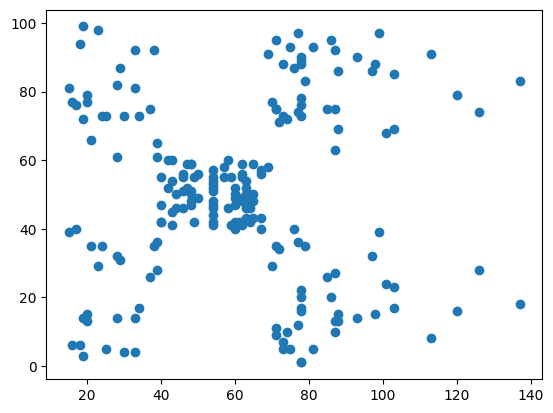

In [9]:
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.show()

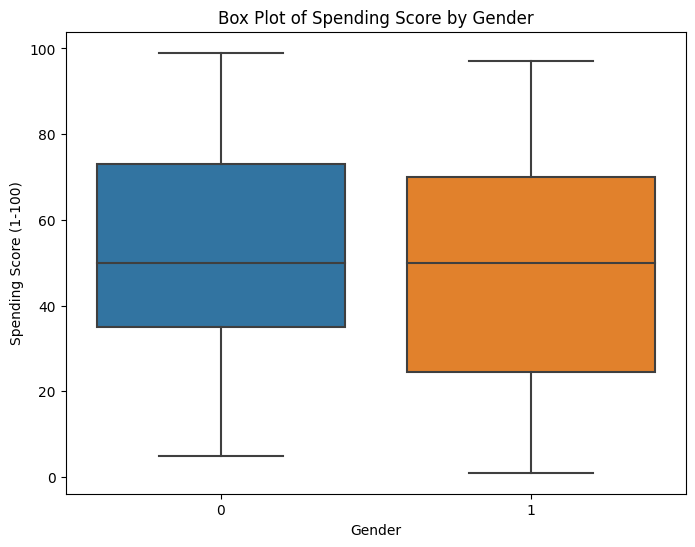

In [10]:

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Box Plot of Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()


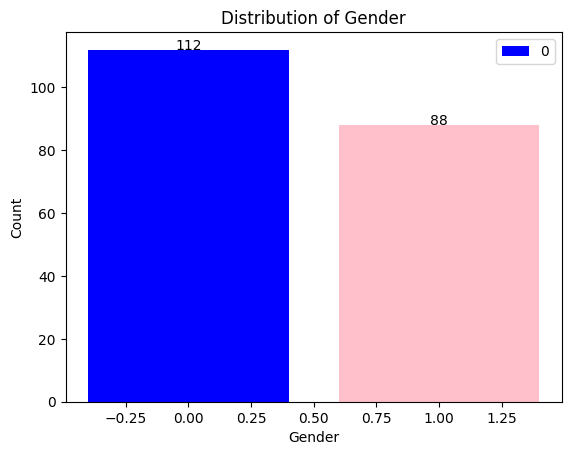

In [11]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the gender data
gender_count = df['Gender'].value_counts()

plt.bar(x=gender_count.index, height=gender_count.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Adding legend
plt.legend(gender_count.index)

# Adding frequency values on top of each bar
for i, count in enumerate(gender_count.values):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

**Step 04: Chossing the number of Clusters**

**Elbow Method**
The Elbow Method helps to find the optimal number of clusters by plotting the within-cluster sum of squares(WCSS) against the number of clusters and looking for the "elbow" point where the rate of decrease in WCSS slows downs.

## Within-Cluster Sum of Squares (WCSS)

WCSS is a metric used to evaluate the quality of clustering in K-means algorithm. It measures the compactness or tightness of the clusters formed by K-means. The goal of K-means is to minimize WCSS, as smaller WCSS indicates that the data points within each cluster are closer to their cluster centroid.

### Formula
WCSS is calculated as the sum of the squared distances between each data point and its corresponding cluster centroid, summed over all clusters:

$WCSS = Σ Σ (distance(data_point, centroid))^2$

Where:
- Σ denotes the sum over all data points and clusters.
- distance(data_point, centroid) represents the Euclidean distance between a data point and its cluster centroid.

### How it Works
1. **Initialization**: Initially, K-means algorithm randomly selects K cluster centroids.
2. **Assignment**: Each data point is assigned to the nearest cluster centroid based on Euclidean distance.
3. **Update Centroids**: After all data points are assigned to clusters, the centroids of the clusters are updated to the mean of the data points assigned to each cluster.
4. **Iteration**: Steps 2 and 3 are repeated iteratively until convergence, with cluster assignments and centroid updates occurring in each iteration.
5. **Calculation of WCSS**: Once the algorithm converges, WCSS is calculated as the sum of squared distances between each data point and its corresponding cluster centroid.

### Interpretation
- Lower WCSS indicates better clustering, as it signifies that data points within each cluster are closer to their respective centroids.
- The Elbow Method utilizes WCSS to find the optimal number of clusters by plotting WCSS against the number of clusters and looking for the "elbow" point where the rate of decrease in WCSS slows down significantly. This point represents a trade-off between minimizing WCSS and avoiding excessive complexity in the model.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

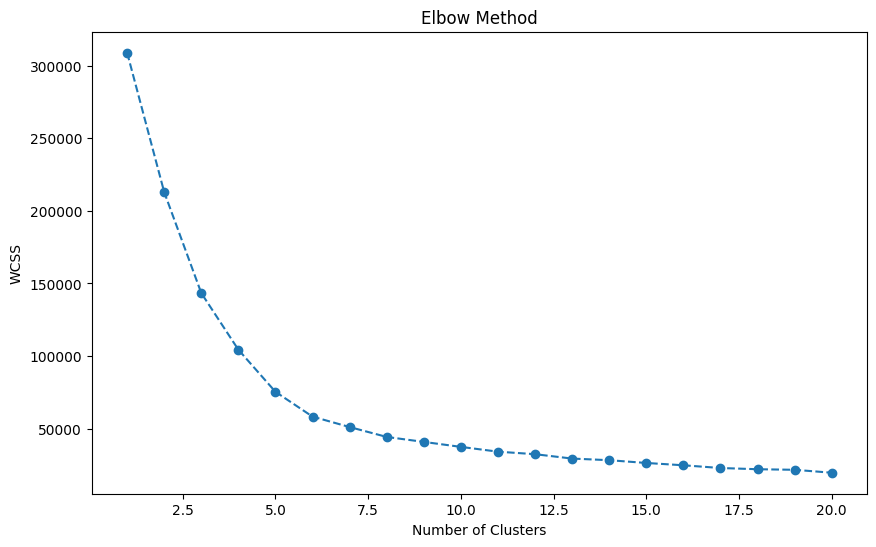

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Selecting the number of clusters using the Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df.iloc[:, 2:])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


**Silhouette Score**

The Sihouette Score measures how similar an object is to its own cluster compared to other clusters. It range from -1 to 1 where a high value indicate that the object is well matches to its own cluster and poorly matches to neightboring clusters.

## Silhouette Score

The Silhouette Score is a metric used to evaluate the quality of clustering in unsupervised learning algorithms such as K-means clustering. It measures how well-separated the clusters are and indicates the appropriateness of the chosen number of clusters.

### Formula
The Silhouette Score for a single data point \( i \) is calculated as follows:

$ s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} $

Where:
- \( s(i) \) is the silhouette score for data point \( i \).
- \( a(i) \) is the average distance from \( i \) to all other data points in the same cluster (intra-cluster distance).
- \( b(i) \) is the minimum average distance from \( i \) to all data points in any other cluster, where \( i \) is not a member (inter-cluster distance).
- The silhouette score ranges from -1 to 1:
  - A score close to +1 indicates that the data point is well-clustered and is far away from neighboring clusters.
  - A score close to 0 indicates that the data point is close to the decision boundary between two clusters.
  - A score close to -1 indicates that the data point may have been assigned to the wrong cluster.

The overall Silhouette Score for the entire dataset is the average of the silhouette scores for all individual data points.

### Interpretation
- A higher Silhouette Score indicates better clustering, with higher cohesion within clusters and better separation between clusters.
- Silhouette Scores close to +1 suggest dense and well-separated clusters.
- Silhouette Scores close to 0 suggest overlapping clusters or that the data point may be on the edge of a cluster.
- Silhouette Scores close to -1 suggest that the data points may be assigned to the wrong clusters.

### Application
- The Silhouette Score is commonly used alongside methods like the Elbow Method to determine the optimal number of clusters in K-means clustering.
- It provides a quantitative measure to compare different clustering algorithms or different parameter settings.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

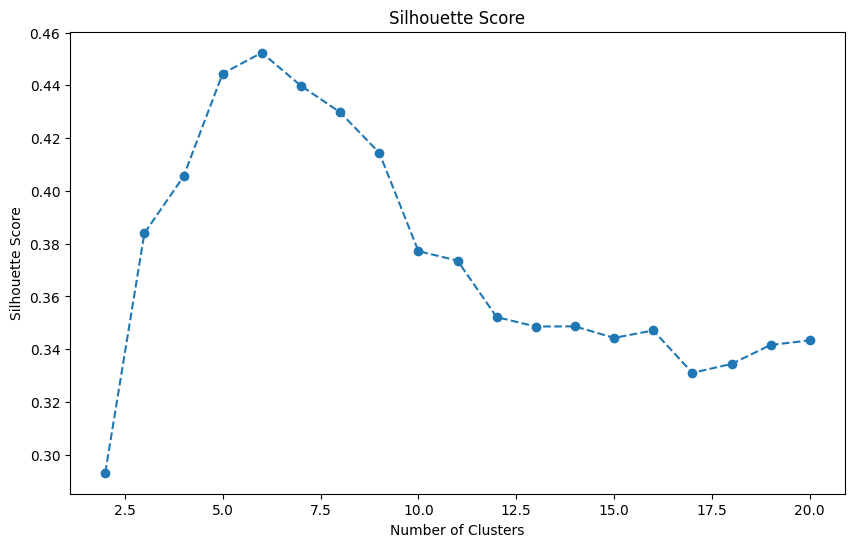

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df.iloc[:, 2:])
    score = silhouette_score(df.iloc[:, 2:], kmeans.labels_)
    silhouette_scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


**Noted**: k-means++': This is the default value. It uses the k-means++ algorithm to initialize the centroids. The k-means++ algorithm selects the initial centroids in a way that makes the algorithm converge faster and results in better final clustering. It does this by selecting initial centroids that are well spread out across the dataset, reducing the likelihood of converging to suboptimal solutions.

**Step 05: Apply KMeans Clustering**

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(df.iloc[:, 2:])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

**Interpretation and Evaluation**

Analyze Clusters:

Now, let;s analyze the resulting clusters to understand the characteristics of each segment


In [15]:
df['Cluster'] = kmeans.labels_

cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         23.000000  0.391304  45.217391           26.304348   
1        162.000000  0.461538  32.692308           86.538462   
2        162.945946  0.513514  40.324324           87.432432   
3         85.012658  0.417722  43.126582           54.822785   
4         23.090909  0.409091  25.272727           25.727273   

         Spending Score (1-100)  
Cluster                          
0                     20.913043  
1                     82.128205  
2                     18.189189  
3                     49.835443  
4                     79.363636  


In [16]:
print("WCSS = ", kmeans.inertia_)

WCSS =  75378.76464074483


**Visualization of Clusters**

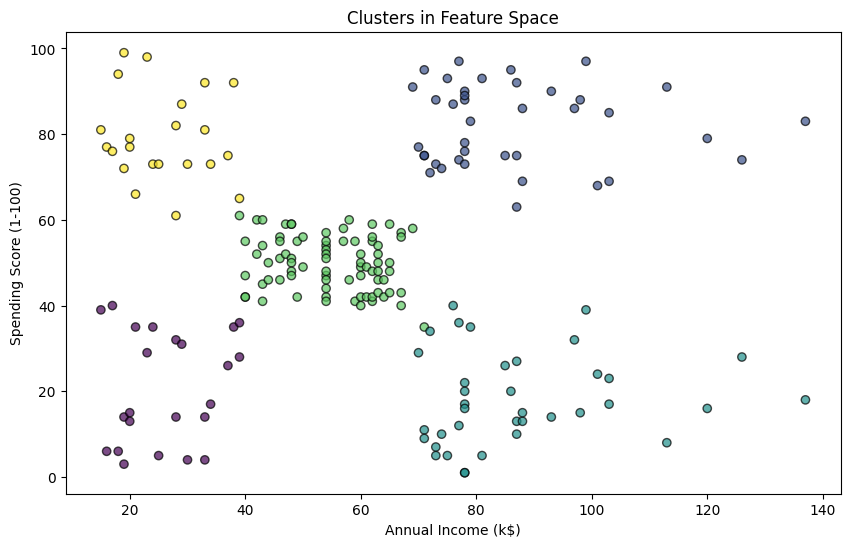

In [17]:
# Plot clusters in 2D feature space
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Clusters in Feature Space')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Plot Clusters against Different Pairs of Features**

Visualize clusters by plotting them against different pairs of features to understand their distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

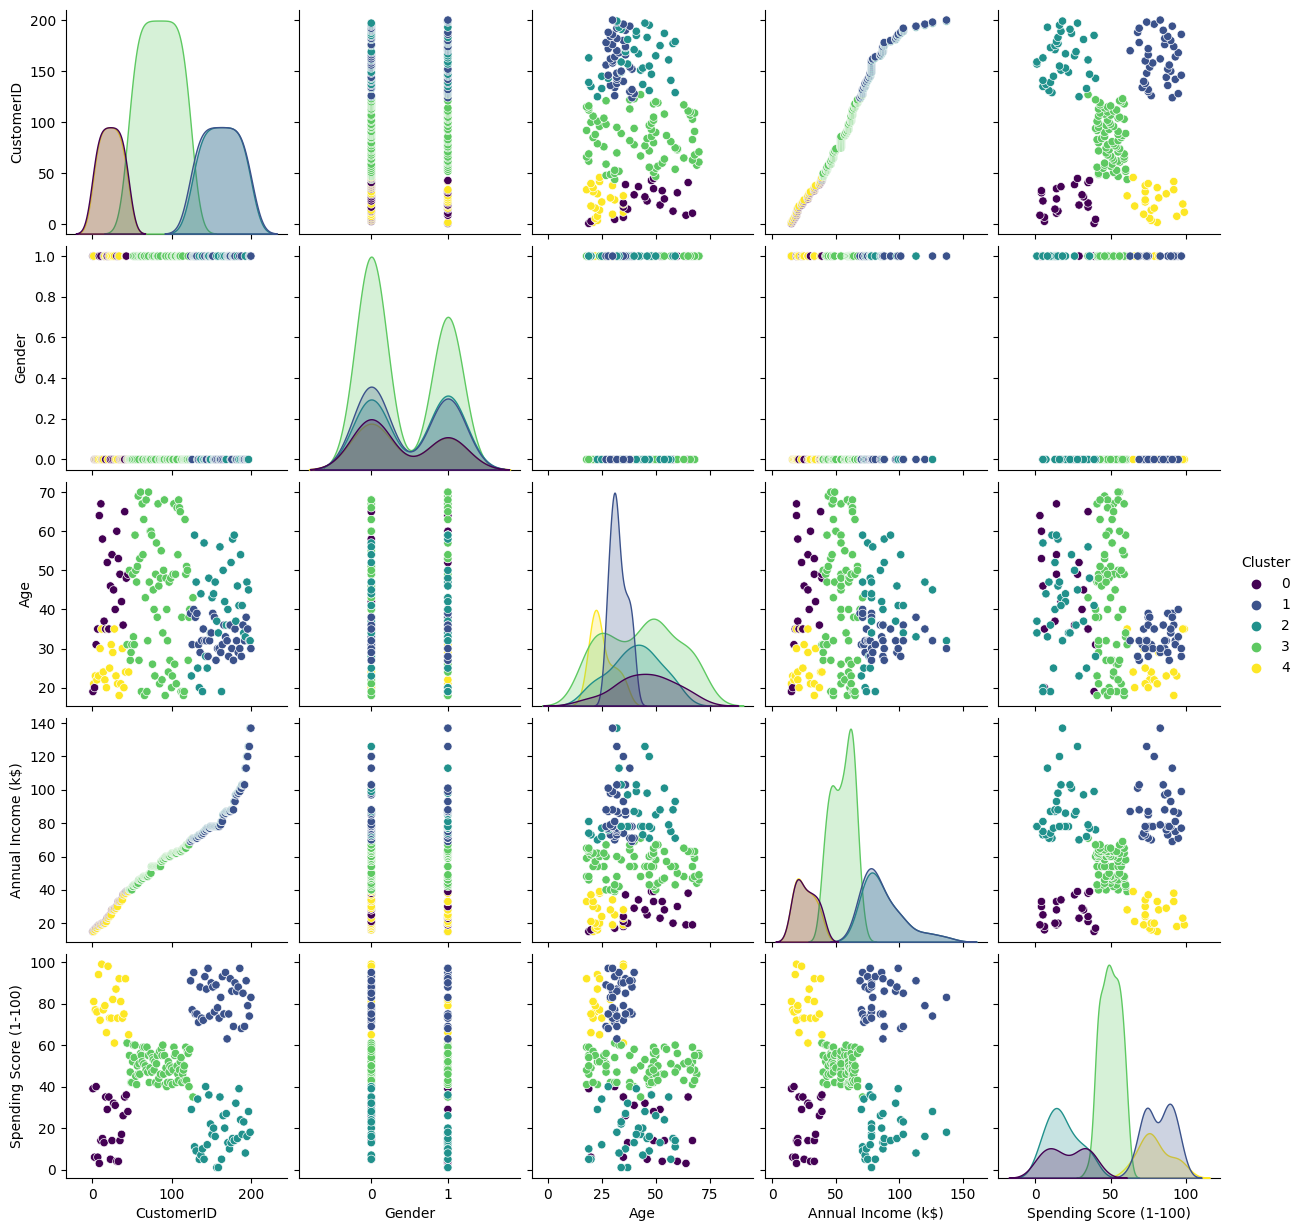

In [18]:

# Pairplot with clusters
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


**Profile nd Lbel the Clusters:**

ssign Lbels anad Create Customer Profiles:
Assign laabels to clusters bses on their characteristic and crate customer profiles for each segment.

In [19]:
# Define labels for clusters based on analysis
cluster_labels = {
    0: 'High Income, High Spending',
    1: 'Low Income, Low Spending',
    2: 'Mid Income, Mid Spending',
    3: 'High Income, Low Spending',
    4: 'Low Income, High Spending'
}

# Assign labels to clusters
df['Cluster Label'] = df['Cluster'].map(cluster_labels)

# Display customer profiles for each segment
print(df.groupby('Cluster Label').mean())


                            CustomerID    Gender        Age  \
Cluster Label                                                 
High Income, High Spending   23.000000  0.391304  45.217391   
High Income, Low Spending    85.012658  0.417722  43.126582   
Low Income, High Spending    23.090909  0.409091  25.272727   
Low Income, Low Spending    162.000000  0.461538  32.692308   
Mid Income, Mid Spending    162.945946  0.513514  40.324324   

                            Annual Income (k$)  Spending Score (1-100)  \
Cluster Label                                                            
High Income, High Spending           26.304348               20.913043   
High Income, Low Spending            54.822785               49.835443   
Low Income, High Spending            25.727273               79.363636   
Low Income, Low Spending             86.538462               82.128205   
Mid Income, Mid Spending             87.432432               18.189189   

                            Cluster  
C

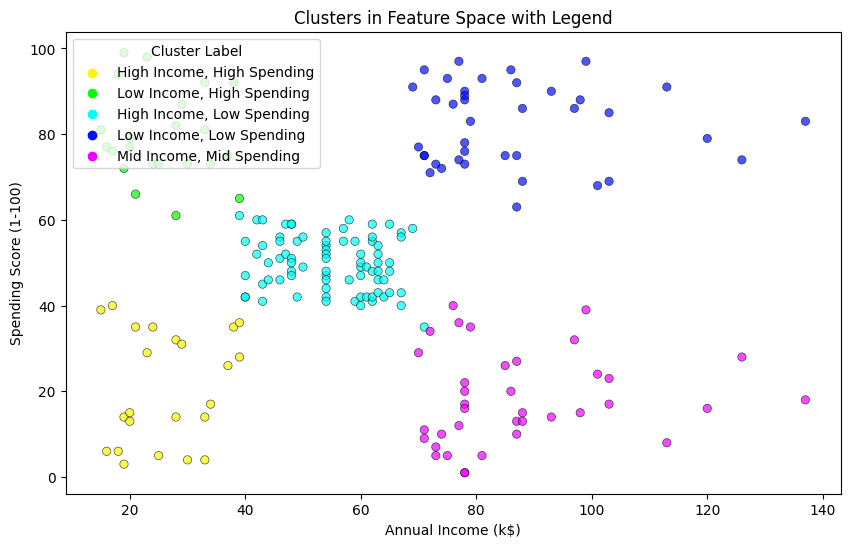

In [20]:
# Define a custom color palette with distinctly different colors
custom_palette = sns.color_palette('hsv', n_colors=len(df['Cluster Label'].unique()))

# Plot clusters in 2D feature space with legend using the custom palette
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster Label', palette=custom_palette, edgecolor='k', alpha=0.7)
plt.title('Clusters in Feature Space with Legend')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label', loc='upper left')
plt.show()